### DATA EXTRACTION

In [77]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')

### DATA REVIEW

In [78]:
print("Number of passengers:", len(titanic_data))
titanic_data.columns
titanic_data.dtypes

titanic_data['class'].unique()

titanic_data.isnull().sum()

Number of passengers: 891


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### DATA TRANSFORMATION

In [79]:
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['class'] = titanic_data['class'].astype(str)
titanic_data.fillna(0, inplace=True)
titanic_data.drop(['alive', 'alone', 'adult_male', 'deck'], axis=1, inplace=True)

titanic_data.isnull().sum()

titanic_data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 0], dtype=object)

In [80]:
# Mapping for embark_town
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Mapping for sex
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Mapping for embarked
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0 : 0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Mapping for class
class_mapping = {'Third': 1, 'First': 2, 'Second': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

# Mapping for who
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
titanic_data['who'] = titanic_data['who'].map(who_mapping)


In [81]:
titanic_data.isnull().sum() #NO MORE EMPTY VALUES

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### TRAIN AND TEST SPLIT

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = titanic_data.drop('survived', axis=1) #Independent variables
y = titanic_data['survived'] #Dependent variable

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

### CREATE DATA MODEL

In [85]:
from sklearn.neighbors import KNeighborsClassifier # import the model

In [86]:
model = KNeighborsClassifier(n_neighbors=3) # initialize the model

In [87]:
model.fit(X_train, y_train) # train the model

KNeighborsClassifier(n_neighbors=3)

In [88]:
prediction_knn = model.predict(X_test) # make predictions on test dataset, since test dataset was not seen

### How good is our model?

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(prediction_knn, y_test) # 0.7653631284916201

0.6871508379888268

### Confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(y_test, prediction_knn)
print(cm)

[[84 25]
 [31 39]]


In [93]:
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'True')

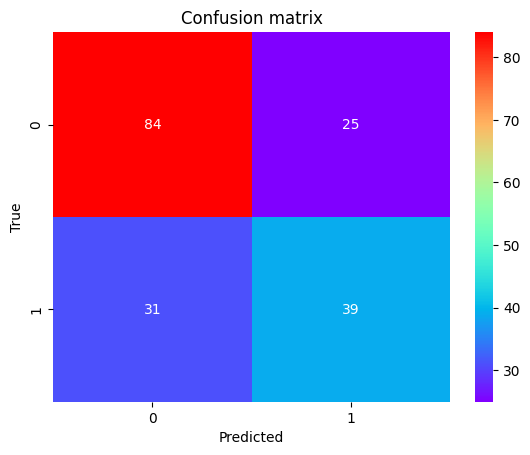

In [94]:
# a heatmap
sns.heatmap(cm, annot = True, cmap = "rainbow")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

### CENTRAL LIMIT THEOREM

The Central Limit Theorem (CLT) states that the distribution of sample means approximates a normal distribution (also known as a Gaussian distribution) as the sample size becomes larger, regardless of the distribution of the population from which the samples are drawn. This theorem is fundamental in statistics.

In [95]:
import numpy as np
import pandas as pd

In [96]:
# Parameters for CLT simulation

sample_size = 100  # Sample size for each experiment
num_of_experiments = 1000  # Number of experiments

In [97]:
# Array to store the means of each sample

sample_means = []

In [98]:
# Simulate the sampling process
# repeatedly sample the survived column, calculate the mean for each sample and then store values of these means in sample_means

for _ in range(num_of_experiments):
    sample = y.sample(sample_size, replace=True)  # Take a random sample with replacement
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

In [99]:
# Convert to NumPy array
sample_means = np.array(sample_means)

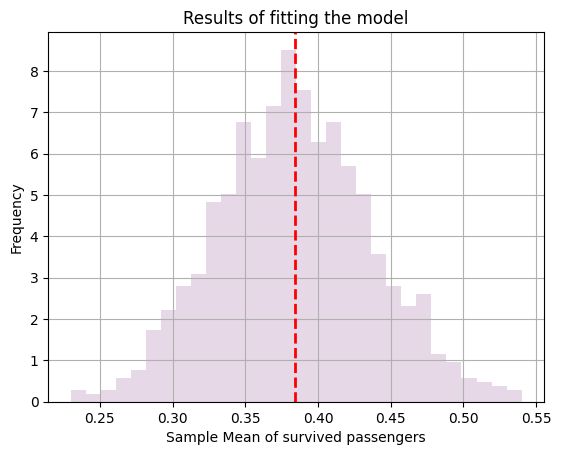

In [100]:
# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color="thistle")
plt.axvline(np.mean(sample_means), color="red", linestyle="dashed", linewidth=2)
plt.title("Results of fitting the model")

plt.xlabel("Sample Mean of survived passengers")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()